In [1]:
#import needed packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import statsmodels.api as statsmodels

#install and show the data
#as we need only three columns, I made new data frame from copying three columns from the original dataset
data = pd.read_csv('kc_house_data.csv')
new = data[["bedrooms", "bathrooms", "price"]].copy()
print(new.head(5))

   bedrooms  bathrooms     price
0         3       1.00  221900.0
1         3       2.25  538000.0
2         2       1.00  180000.0
3         4       3.00  604000.0
4         3       2.00  510000.0


In [2]:
#show statistics of the new data set which consists of three necessary columns
print(new.describe()) #use pandas method .describe() to show some statistics of the data

def morestatistics(column1): #create a function to show other statistics of the data
    column = list(column1.values) #make list from the data frame values
    mode = max(column, key=column.count) #search for the values with the max number of occurance
    print('mode = ' + str(mode)) #show mode
    column.sort() #put values in order from min to max
    med1=column[len(column)//2] #find the first middle value through integer division
    med2=column[len(column)//2-1] #find the second middle value (as we know that the dataset has odd № of rows)
    median_column=(med1+med2)/2 #calculate median as the arithmetical mean of 2 middle values
    print('median = ' + str(median_column)) #show median

#perform our function to three columns in our data frame
print('bedrooms other statistics:')
morestatistics(new["bedrooms"]) 
print('bathrooms other statistics:')
morestatistics(new["bathrooms"])
print('price other statistics:')
morestatistics(new["price"])

           bedrooms     bathrooms         price
count  21613.000000  21613.000000  2.161300e+04
mean       3.370842      2.114757  5.400881e+05
std        0.930062      0.770163  3.671272e+05
min        0.000000      0.000000  7.500000e+04
25%        3.000000      1.750000  3.219500e+05
50%        3.000000      2.250000  4.500000e+05
75%        4.000000      2.500000  6.450000e+05
max       33.000000      8.000000  7.700000e+06
bedrooms other statistics:
mode = 3
median = 3.0
bathrooms other statistics:
mode = 2.5
median = 2.25
price other statistics:
mode = 450000.0
median = 450000.0


/Users/miss_evgenia/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R-squared =  0.276
Regression equation: price =  250326.516 * bathrooms +  10708.309


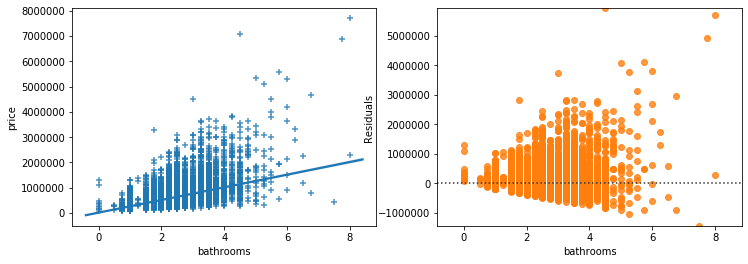

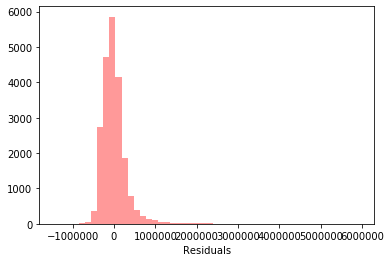

In [3]:
#this is a function which shows the plot of the data with the regression line on it,
# residuals graph, and the distribution of residuals as well as R-squared and regression equation

def regression_model(column_x, column_y):

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x]) #set the intercept to 0, if it is excluded
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #count regression parameters
    
    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3) #extract R-squared
    slope = round(regressionmodel.params[1],3) #extract the slope of the regression line
    intercept = round(regressionmodel.params[0],3) #extract the intercept
    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4)) #create a figure
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # make scatter plot and regression line
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals') #name the y-axis
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1) #set limits for the y-axis
    plt.figure() # make a distinct figure to show the histogram of residuals
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') #histogram
    
    # print the results:
    print("R-squared = ",Rsquared) #print R-squares
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept) #print regression equation
    
regression_model("bathrooms", "price")

R-squared =  0.095
Regression equation: price =  121716.127 * bedrooms +  129802.356


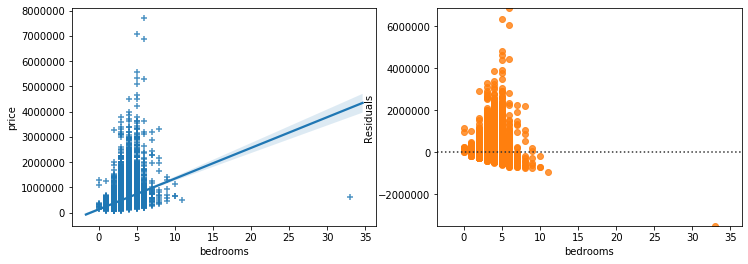

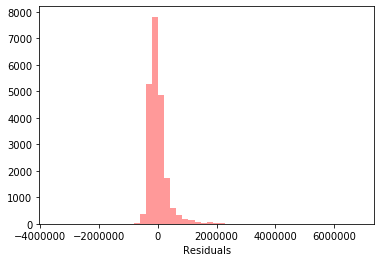

In [4]:
regression_model("bedrooms", "price")

In [5]:
print(stats.pearsonr(data["bathrooms"], data["price"]))

(0.525137505413962, 0.0)


In [6]:
def regression_model_summary(column_x, column_y):
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit()
    print(regressionmodel.summary())
regression_model_summary("bathrooms", "price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:24:36   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0